In [1]:
import pandas as pd
import numpy as np
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [2]:
sc = MinMaxScaler(feature_range=(0,1))
df_train = pd.read_csv('data/market_data.csv', parse_dates=['Time'], index_col='Time')
train_set = df_train[:'2026-01-08 20:28:39'].iloc[:,1:2].values 
sc.fit(train_set)


,"feature_range feature_range: tuple (min, max), default=(0, 1)Desired range of transformed data.","(0, ...)"
,"copy copy: bool, default=TrueSet to False to perform inplace row normalization and avoid acopy (if the input is already a numpy array).",True
,"clip clip: bool, default=FalseSet to True to clip transformed values of held-out data toprovided `feature_range`.Since this parameter will clip values, `inverse_transform` may notbe able to restore the original data... note:: Setting `clip=True` does not prevent feature drift (a distribution shift between training and test data). The transformed values are clipped to the `feature_range`, which helps avoid unintended behavior in models sensitive to out-of-range inputs (e.g. linear models). Use with care, as clipping can distort the distribution of test data... versionadded:: 0.24",False


Predicted prices for the next 2Hours:


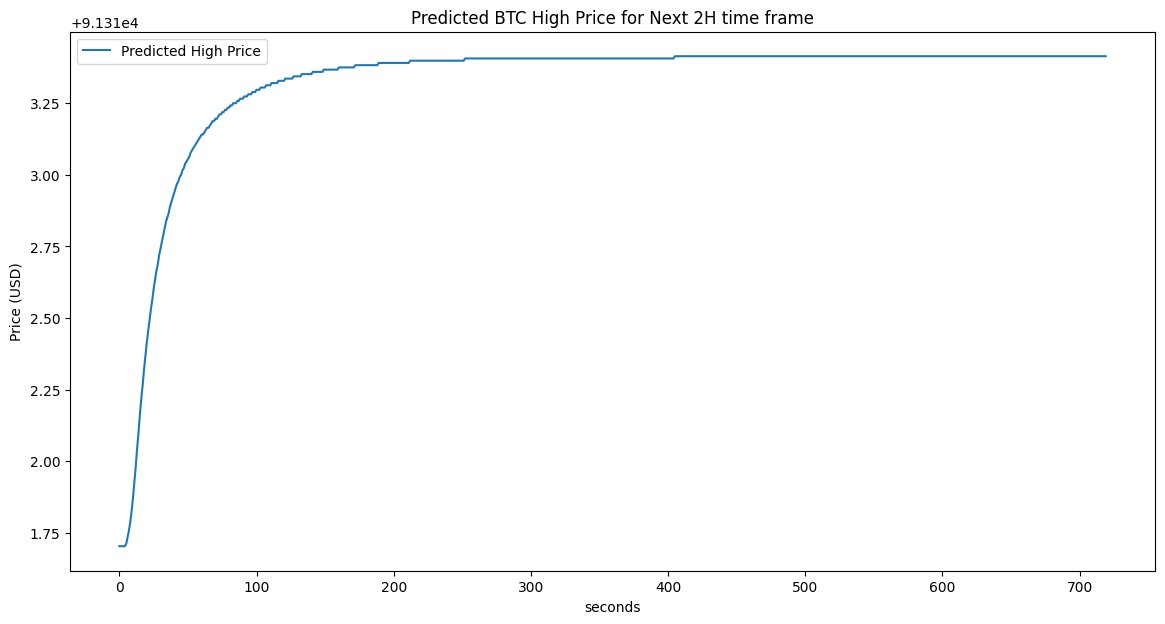

In [ ]:
model = load_model('models/model.h5')
df_new = pd.read_csv('data/market_data.csv')
if 'Time' in df_new.columns:
    df_new = df_new.set_index('Time')
new_data = df_new['High'].values.reshape(-1,1)
new_data_scaled = sc.transform(new_data)
seq_length = 400 #sequence used to predict 
if len(new_data_scaled) >= seq_length:
    # Get last 100 points for future prediction
    last_100_scaled = new_data_scaled[-seq_length:]
    
    # Predict next 2h(7200s) points in seconds
    predictions = []
    for _ in range(720): #TO DO : re-replace it for the DAY 86400 marker #RN 2h prediction
        x_input = last_100_scaled.reshape(1, seq_length, 1)
        pred = model.predict(x_input, verbose=0)
        predictions.append(pred[0][0])
        # Update window
        last_100_scaled = np.append(last_100_scaled[1:], pred[0])
    
    predictions = np.array(predictions).reshape(-1,1)
    pred_prices = sc.inverse_transform(predictions)
    
    print('Predicted prices for the next 2Hours:')
    
    # Plot actual predicted prices
    plt.figure(figsize=(14,7))
    plt.plot(pred_prices, label='Predicted High Price')
    plt.title('Predicted BTC High Price for Next 2H time frame')
    plt.xlabel('seconds')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.show()
    
else:
    print(f'Not enough data for prediction, have {len(new_data_scaled)}, need at least {seq_length} points')

In [ ]:
print(pred_prices)
np.save('predictions.npy', pred_prices)  

[[91311.7  ]
 [91311.7  ]
 [91311.7  ]
 [91311.7  ]
 [91311.7  ]
 [91311.71 ]
 [91311.734]
 [91311.76 ]
 [91311.79 ]
 [91311.83 ]
 [91311.875]
 [91311.93 ]
 [91311.984]
 [91312.05 ]
 [91312.1  ]
 [91312.164]
 [91312.22 ]
 [91312.266]
 [91312.32 ]
 [91312.37 ]
 [91312.414]
 [91312.45 ]
 [91312.49 ]
 [91312.53 ]
 [91312.56 ]
 [91312.6  ]
 [91312.63 ]
 [91312.664]
 [91312.69 ]
 [91312.72 ]
 [91312.74 ]
 [91312.766]
 [91312.79 ]
 [91312.81 ]
 [91312.836]
 [91312.85 ]
 [91312.87 ]
 [91312.89 ]
 [91312.91 ]
 [91312.92 ]
 [91312.94 ]
 [91312.95 ]
 [91312.97 ]
 [91312.98 ]
 [91312.99 ]
 [91313.   ]
 [91313.016]
 [91313.02 ]
 [91313.04 ]
 [91313.05 ]
 [91313.055]
 [91313.06 ]
 [91313.08 ]
 [91313.086]
 [91313.09 ]
 [91313.1  ]
 [91313.11 ]
 [91313.12 ]
 [91313.125]
 [91313.13 ]
 [91313.14 ]
 [91313.14 ]
 [91313.15 ]
 [91313.16 ]
 [91313.164]
 [91313.164]
 [91313.17 ]
 [91313.18 ]
 [91313.19 ]
 [91313.19 ]
 [91313.195]
 [91313.195]
 [91313.2  ]
 [91313.21 ]
 [91313.21 ]
 [91313.22 ]
 [91313.22 ]